In [1]:
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt


def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/svg/" + base64_string))

In [5]:
mm("""
   graph TD
A[fa:fa-database JetBrains Datastore 10M Dataset] 
    -->|Download ntbs_list.json, pick 100K notebooks|B
B[fa:fa-database 100k-dataset.csv]
    -->|fetch_notebooks.py| C[fa:fa-book Download 100K Notebooks]
C -->|Store| D[fa:fa-file Data 100K Notebooks]
D -->|export_notebooks_to_html.py| E{HTML files by Theme}
E --> F[Darcula]
E --> G[Horizon]
E --> H[Material Darker]
E --> I[Solarized]
E --> J[Light]
E --> K[Dark]
J --> 
    |process_notebook_html.py|L(nb_processed_cell_html.csv)
L -->
    |get_first_interactive_cells.py|M(nb_first_interactive_cell.csv)
F -->N{Scan}
G -->N
H -->N
I -->N
J -->N
K -->N
N -->|pa11y_scan_parallel.py|X[pa11y-results]
X -->|fetch_a11y_responses.py|O{Results}
O -->P(a11y-aggregate-scan.csv)
O -->Q(a11y-detailed-result.csv)
Q -->|generate_accessibility_error_counts.py|R(errors-different-counts-a11y-analyze-errors-summary.csv)
D -->|process_notebooks.py|S[Base64 Images]
S -->|classify_images.py|T(model-results.csv)
D -->|process_notebooks.py|U(nb_processed.csv)
U -->|analyze_function_calls.py|V(processed_function_calls.csv)
   """
   )

NameError: name 'mm' is not defined

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/ainsleymartinez/Downloads/a11y-aggregate-scan.csv')


In [6]:
# Ensure numerical columns are treated as numbers
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Errors'] = pd.to_numeric(df['Errors'], errors='coerce')
df['Warnings'] = pd.to_numeric(df['Warnings'], errors='coerce')

# Calculate the proportions
df['Error Proportion'] = df['Errors'] / df['Total']
df['Warning Proportion'] = df['Warnings'] / df['Total']


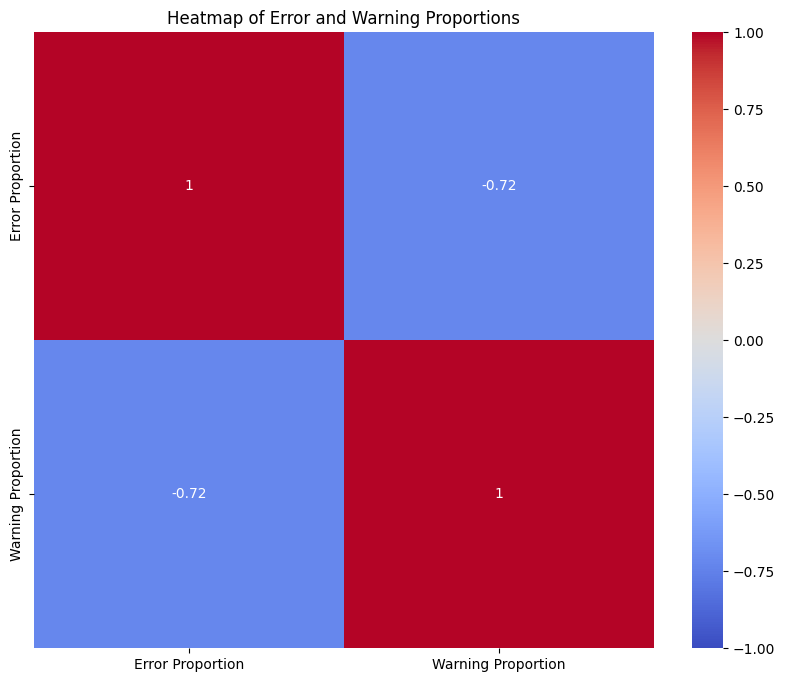

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the heatmap
heatmap_data = df[['Error Proportion', 'Warning Proportion']]

# Create a correlation matrix for the heatmap
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Error and Warning Proportions')
plt.show()


In [12]:
df

,ID,Notebook,Theme,Standard,Date,Total,Errors,Warnings,Notices,Error Proportion,Warning Proportion
0,abef44ae06db4204313800369b7f974349978351cd9c77...,f22a8028b9fd08cce576531c004f250b08852c58.ipynb,dark,WCAG2AA,NaN,149,75,43,31,0.503356,0.288591
1,010c9497f00c20c62f278456327bb9e3933c4fcef5c6b7...,0b06f98da97edb472f2fc1995dab235c4063a89e.ipynb,dark,WCAG2AA,NaN,356,253,69,34,0.710674,0.193820
2,8662195164e1ba0cf34dc5fa7a22306c883229e99f6efa...,02ad60c3d2e7a492f98d1f4570a4edf693fa0c46.ipynb,dark,WCAG2AA,NaN,570,363,161,46,0.636842,0.282456
3,db617cb33c8a99dc4528f2ad1d9639f629976b834b24e2...,195b6cb332678c68d81e4cebbe9f49af20616872.ipynb,dark,WCAG2AA,NaN,1316,431,843,42,0.327508,0.640578
4,3c70174e0a705ab004f765a7f132db59e87855156bc93b...,f8ddb93b77a299a2b2b0ffb6bbc48ca8b41c22e7.ipynb,dark,WCAG2AA,NaN,458,388,40,30,0.847162,0.087336
...,...,...,...,...,...,...,...,...,...,...,...
571480,cbf700a9e7adb07c63509336565d97baa3ab131f1d5877...,7f1af1aec4790810b1656b792fdbf1a35d74c3f1.ipynb,solarized,WCAG2AA,NaN,191,47,112,32,0.246073,0.586387
571481,0d5fb307d2bddb9138631a277a73069283daab8597c8d6...,06a07d156ce1f4938f7686d8dc34db0a3edb0747.ipynb,solarized,WCAG2AA,NaN,165,100,41,24,0.606061,0.248485
571482,fb50be8bcc0aec1cf0267f2289f82bb22b064e4827052a...,d0307e287404077e2df7ae07f9052953fef6bc08.ipynb,solarized,WCAG2AA,NaN,1871,1070,523,278,0.571887,0.279530
571483,8d26756916c30f603b86316d838e4090efb81fc28096d8...,2f0fc2db70f8c6b5269590fa8e3fdce7f6baa0f3.ipynb,solarized,WCAG2AA,NaN,83,34,21,28,0.409639,0.253012


In [11]:
import pandas as pd

# Load a sample of the data to check the structure
df = pd.read_csv('/Users/ainsleymartinez/Downloads/a11y-aggregate-scan.csv', nrows=1000)


In [13]:
print(df.head())
print(df.columns)


                                                  ID  \
0  abef44ae06db4204313800369b7f974349978351cd9c77...   
1  010c9497f00c20c62f278456327bb9e3933c4fcef5c6b7...   
2  8662195164e1ba0cf34dc5fa7a22306c883229e99f6efa...   
3  db617cb33c8a99dc4528f2ad1d9639f629976b834b24e2...   
4  3c70174e0a705ab004f765a7f132db59e87855156bc93b...   

                                         Notebook Theme Standard  Date  Total  \
0  f22a8028b9fd08cce576531c004f250b08852c58.ipynb  dark  WCAG2AA   NaN    149   
1  0b06f98da97edb472f2fc1995dab235c4063a89e.ipynb  dark  WCAG2AA   NaN    356   
2  02ad60c3d2e7a492f98d1f4570a4edf693fa0c46.ipynb  dark  WCAG2AA   NaN    570   
3  195b6cb332678c68d81e4cebbe9f49af20616872.ipynb  dark  WCAG2AA   NaN   1316   
4  f8ddb93b77a299a2b2b0ffb6bbc48ca8b41c22e7.ipynb  dark  WCAG2AA   NaN    458   

   Errors  Warnings  Notices  Error Proportion  Warning Proportion  \
0      75        43       31          0.503356            0.288591   
1     253        69       34        

In [ ]:
# Ensure numeric columns are in the correct format
df['Errors'] = pd.to_numeric(df['Errors'], errors='coerce')
df['Warnings'] = pd.to_numeric(df['Warnings'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Drop rows with missing values in these columns
df = df.dropna(subset=['Errors', 'Warnings', 'Total'])


In [ ]:
aggregated_df = df.groupby('Notebook').agg({
    'Errors': 'sum',
    'Warnings': 'sum',
    'Total': 'sum'
}).reset_index()


In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot comparing Errors and Warnings to Total
plt.figure(figsize=(12, 8))

# Plot Errors and Warnings as a fraction of Total
plt.bar(aggregated_df['Notebook'], aggregated_df['Errors'] / aggregated_df['Total'], label='Errors')
plt.bar(aggregated_df['Notebook'], aggregated_df['Warnings'] / aggregated_df['Total'], bottom=aggregated_df['Errors'] / aggregated_df['Total'], label='Warnings')

plt.xlabel('Notebook')
plt.ylabel('Proportion of Total')
plt.title('Proportion of Errors and Warnings to Total Issues')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/ainsleymartinez/Downloads/a11y-aggregate-scan.csv', nrows=1000)

# Convert relevant columns to numeric and handle missing values
df['Errors'] = pd.to_numeric(df['Errors'], errors='coerce')
df['Warnings'] = pd.to_numeric(df['Warnings'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df = df.dropna(subset=['Errors', 'Warnings', 'Total'])

# Classify each entry
df['Category'] = 'Successful'
df.loc[df['Errors'] > 0, 'Category'] = 'Errors'
df.loc[df['Warnings'] > 0, 'Category'] = 'Warnings'

# Prepare data for plotting
df['x'] = df.index  # Using index for x-axis positioning
df['y'] = 0  # Constant y value for dot plot

# Define colors for categories
colors = {'Errors': 'red', 'Warnings': 'orange', 'Successful': 'blue'}

# Create the plot
plt.figure(figsize=(12, 8))

# Plot dots for each category
for category, color in colors.items():
    subset = df[df['Category'] == category]
    plt.scatter(subset['x'], subset['y'], color=color, label=category, alpha=0.6, edgecolor='k', s=100)

# Add labels and title
plt.yticks([])  # Remove y-axis ticks as it's a dot plot
plt.xlabel('Notebook Index')
plt.title('Dot Plot of Errors, Warnings, and Successful Notebooks')
plt.legend(title='Category')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
df['Total Issues'] = df['Errors'] + df['Warnings'] + df['Notices']

# Calculate the percentage of errors
df['Error Percentage'] = (df['Errors'] / df['Total Issues']) * 100

# Print the result
print(df[['ID', 'Error Percentage']])

                                                       ID  Error Percentage
0       abef44ae06db4204313800369b7f974349978351cd9c77...         50.335570
1       010c9497f00c20c62f278456327bb9e3933c4fcef5c6b7...         71.067416
2       8662195164e1ba0cf34dc5fa7a22306c883229e99f6efa...         63.684211
3       db617cb33c8a99dc4528f2ad1d9639f629976b834b24e2...         32.750760
4       3c70174e0a705ab004f765a7f132db59e87855156bc93b...         84.716157
...                                                   ...               ...
571480  cbf700a9e7adb07c63509336565d97baa3ab131f1d5877...         24.607330
571481  0d5fb307d2bddb9138631a277a73069283daab8597c8d6...         60.606061
571482  fb50be8bcc0aec1cf0267f2289f82bb22b064e4827052a...         57.188669
571483  8d26756916c30f603b86316d838e4090efb81fc28096d8...         40.963855
571484  d79a0eed8ba6c86b750869e10c5bfb239717ac2f3c8313...         60.169492

[571485 rows x 2 columns]


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns

matplotlib.rcParams.update({'font.size': 20, 'pdf.fonttype': 42, 'ps.fonttype': 42})

In [13]:
different_errors = pandas.read_csv('/Users/ainsleymartinez/Downloads/errors-different-counts-a11y-analyze-errors-summary.csv')

In [14]:
error_grid = different_errors[different_errors['Type'] == 'error'].pivot(index='Theme', columns=['Runner', 'DetailCode'], values='count')


In [16]:
axe_errors = error_grid['axe']
axe_error_columns = axe_errors.columns

reassignment = {}

for i, column_name in enumerate(axe_error_columns):
    reassignment[column_name] = f'AXE-E{i+1}'

reassignment_df = pandas.DataFrame.from_dict(reassignment, orient="index")
reassignment_df.rename(columns={0: 'Error Code'}, inplace=True)
reassignment_df

,Error Code
color-contrast,AXE-E1
image-alt,AXE-E2
link-in-text-block,AXE-E3
link-name,AXE-E4
bypass,AXE-E5
audio-caption,AXE-E6
aria-hidden-focus,AXE-E7
aria-input-field-name,AXE-E8
aria-required-parent,AXE-E9
region,AXE-E10


In [17]:
axe_errors.rename(columns=reassignment, inplace=True)
axe_errors

/var/folders/k_/2506mzl95zlb07kmp0vc1vpm0000gn/T/ipykernel_21133/1119864014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axe_errors.rename(columns=reassignment, inplace=True)


DetailCode,AXE-E1,AXE-E2,AXE-E3,AXE-E4,AXE-E5,AXE-E6,AXE-E7,AXE-E8,AXE-E9,AXE-E10
Theme,,,,,,,,,,
darcula,14925118,297021,79246,4721,2277,633,77,47,38,5
dark,3420965,297021,79246,4720,2278,635,77,46,28,5
horizon,2561526,297021,79246,4722,2278,633,77,47,38,5
light,9779805,296992,1103,4719,2276,634,81,46,10,5
material-darker,5165510,297021,79246,4720,2279,635,77,47,28,5
solarized,7428277,297021,79557,4718,2276,633,77,47,28,5


In [18]:
for updated_column in axe_errors.columns.tolist():
    normalizer = axe_errors[updated_column].max()
    axe_errors[updated_column] = axe_errors[updated_column] / normalizer * 100.0
    
axe_errors

/var/folders/k_/2506mzl95zlb07kmp0vc1vpm0000gn/T/ipykernel_21133/3874306261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  axe_errors[updated_column] = axe_errors[updated_column] / normalizer * 100.0


DetailCode,AXE-E1,AXE-E2,AXE-E3,AXE-E4,AXE-E5,AXE-E6,AXE-E7,AXE-E8,AXE-E9,AXE-E10
Theme,,,,,,,,,,
darcula,100.000000,100.000000,99.609085,99.978823,99.912242,99.685039,95.061728,100.00000,100.000000,100.0
dark,22.920857,100.000000,99.609085,99.957645,99.956121,100.000000,95.061728,97.87234,73.684211,100.0
horizon,17.162518,100.000000,99.609085,100.000000,99.956121,99.685039,95.061728,100.00000,100.000000,100.0
light,65.525814,99.990236,1.386427,99.936468,99.868363,99.842520,100.000000,97.87234,26.315789,100.0
material-darker,34.609509,100.000000,99.609085,99.957645,100.000000,100.000000,95.061728,100.00000,73.684211,100.0
solarized,49.770307,100.000000,100.000000,99.915290,99.868363,99.685039,95.061728,100.00000,73.684211,100.0


In [19]:
fig7a_description = """Figure 7(a) The heatmap of errors for aXe indicates the percentage of errors of different 
types. The type of errors are presented on the x axis and the themes along the y axis with each cell ranging 
between 0 and 100.0. The corresponding legend of the color bar is to the right side of the figure.
"""

FileNotFoundError: [Errno 2] No such file or directory: 'plot_out/fig-7a-errors-axe-heatmap.pdf'

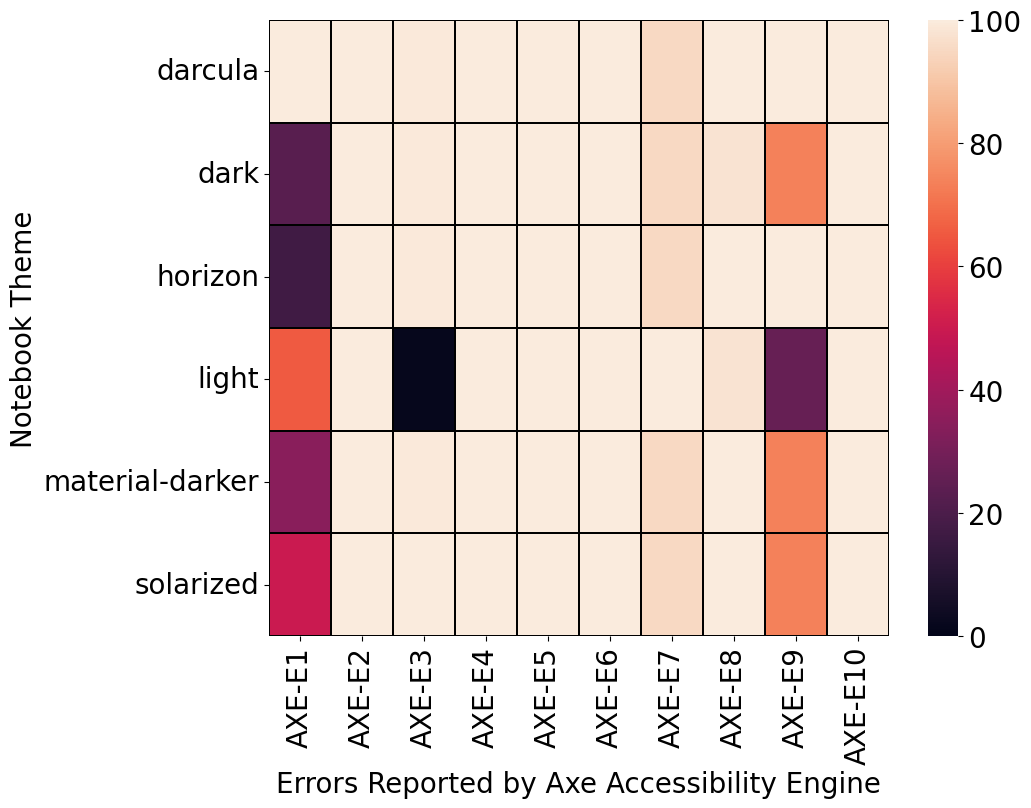

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(axe_errors, robust=True, linewidths=0.1, linecolor='black', ax=ax, vmin=0, vmax=100)
ax.set_ylabel('Notebook Theme', fontsize=20)
ax.set_xlabel('Errors Reported by Axe Accessibility Engine', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('plot_out/fig-7a-errors-axe-heatmap.pdf', bbox_inches='tight')
plt.savefig('plot_out/alt-embedded-images/fig-7a-errors-axe-heatmap.png',
            metadata={'alt': fig7a_description},
            bbox_inches='tight')